In [1]:
import routingpy as rp
from shapely.geometry import LineString, Point, Polygon
from matplotlib import pyplot as plt
import geopandas as gpd
import contextily as cx
from pprint import pprint

BASEMAP_SOURCE = cx.providers.CartoDB.Positron
coordinates = [[8.512516, 47.380742], [8.557835, 47.359467]]
plt.rcParams['figure.dpi'] = 50

## 1. Directions

In [2]:
# Create your own API key at https://openrouteservice.org/sign-up
key_ors = ""
api = rp.ORS(api_key=key_ors)

route = api.directions(locations=coordinates, profile='driving-car')

In [3]:
start_end = gpd.GeoDataFrame(geometry=[Point(x,y) for x,y in coordinates], crs="EPSG:4326").to_crs("EPSG:3857")
route_line = gpd.GeoDataFrame(geometry=[LineString(route.geometry)], crs="EPSG:4326").to_crs("EPSG:3857")

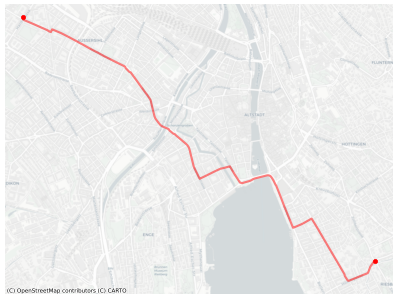

In [4]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
start_end.plot(ax=ax, color="red")
route_line.plot(ax=ax, color="red", linewidth=3, alpha=0.5)
cx.add_basemap(ax=ax, crs="EPSG:3857", source=BASEMAP_SOURCE)
_ = ax.axis("off")

## 2. Isochrones

In [5]:
# defaults to https://valhalla1.openstreetmap.de
api = rp.Valhalla()

isochrones = api.isochrones(locations=coordinates[0],
                      profile='auto',
                      intervals=[100,200])

In [6]:
isochrone_df = gpd.GeoDataFrame(
                            {"id": [x for x in range(len(isochrones))]},
                            geometry=[Polygon(X.geometry) for X in reversed(isochrones)], crs="EPSG:4326",
                                ).to_crs("EPSG:3857")

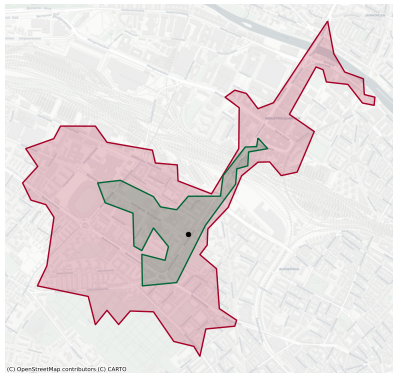

In [7]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
isochrone_df.plot(ax=ax, column="id", cmap="RdYlGn", linewidth=0, alpha=0.2)
isochrone_df.plot(ax=ax, column="id", cmap="RdYlGn", linewidth=2, alpha=1, facecolor="none")
start_end.iloc[:-1].plot(ax=ax, color="black", markersize=45)
cx.add_basemap(ax=ax, crs="EPSG:3857", source=BASEMAP_SOURCE)
_ = ax.axis("off")

## 3. Matrix

In [8]:
# Create your own API key at https://developer.here.com/?create=Freemium-Basic&keepState=true&step=account
here_key = ""
api = rp.HereMaps(api_key=here_key)

matrix = api.matrix(locations=coordinates, profile='car')

pprint(matrix.durations)
pprint(matrix.raw)

[[0, 780], [765, 0]]
{'response': {'matrixEntry': [{'destinationIndex': 0,
                               'startIndex': 0,
                               'summary': {'costFactor': 1,
                                           'distance': 0,
                                           'travelTime': 0}},
                              {'destinationIndex': 1,
                               'startIndex': 0,
                               'summary': {'costFactor': 780,
                                           'distance': 5680,
                                           'travelTime': 780}},
                              {'destinationIndex': 0,
                               'startIndex': 1,
                               'summary': {'costFactor': 765,
                                           'distance': 5629,
                                           'travelTime': 765}},
                              {'destinationIndex': 1,
                               'startIndex': 1,
                 

## 4. Expansion

In [4]:
valhalla_public_url = "https://valhalla1.openstreetmap.de"
api = rp.Valhalla(base_url=valhalla_public_url)

expansions = api.expansion(locations=coordinates[0],
                      profile='auto',
                      intervals=[200],
                      expansion_properties=["durations"])

In [5]:
expansion_df = gpd.GeoDataFrame(
                            {"id": [x for x in range(len(expansions))], "duration": [x.duration for x in expansions]},
                            geometry=[LineString(X.geometry) for X in expansions], crs="EPSG:4326",
                                ).to_crs("EPSG:3857")

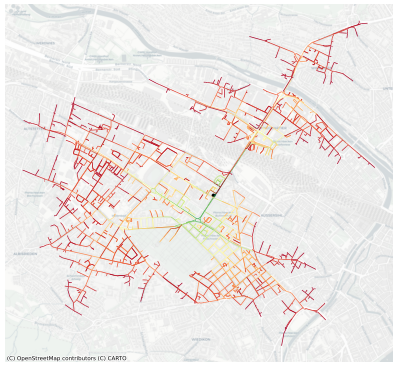

In [6]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
expansion_df[expansion_df["duration"] <= 200].plot(ax=ax, column="duration", cmap="RdYlGn_r", linewidth=1, alpha=1)
start_end.iloc[:-1].plot(ax=ax, color="black", markersize=20)
cx.add_basemap(ax=ax, crs="EPSG:3857", source=BASEMAP_SOURCE)
_ = ax.axis("off") 